In [30]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency

#K Nearest
from sklearn.neighbors import KNeighborsClassifier
# Train Test Split
from sklearn.model_selection import train_test_split
#Accuracy
from sklearn.metrics import accuracy_score
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression

In [3]:
Titanic_Data = pd.read_csv("C:/Users/Alock/Downloads/titanic_train.csv")
Titanic_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Titanic_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Create Masks For Each Row
Survived = Titanic_Data[Titanic_Data['Survived'] == 1]
#class
HighClass = Titanic_Data[Titanic_Data['Pclass'] == 3]
MidClass = Titanic_Data[Titanic_Data['Pclass'] == 2]
LowClass = Titanic_Data[Titanic_Data['Pclass'] == 1]
#gender
Male =  Titanic_Data[Titanic_Data['Sex'] == 'male']
Female = Titanic_Data[Titanic_Data['Sex'] == 'male']
#C = Cherbourg, Q = Queenstown, S = Southampton , Titanic_Data['Age'] > 40 , Titanic_Data['Age'] >= 18 
Cherbourg = Titanic_Data[Titanic_Data['Embarked'] == 'C']
Queenstown = Titanic_Data[Titanic_Data['Embarked'] == 'Q']
Southampton = Titanic_Data[Titanic_Data['Embarked'] == 'S']
#Age
Older = Titanic_Data[Titanic_Data['Age'] >= 60]
MiddleAged = Titanic_Data[Titanic_Data['Age'] < 60]
MiddleAged = MiddleAged[MiddleAged['Age'] > 40 ]
YoungAdult =Titanic_Data[Titanic_Data['Age'] <= 40]
YoungADult = YoungAdult[YoungAdult['Age'] >= 18 ]
Child = Titanic_Data[Titanic_Data['Age'] < 18]
#Ver Survived
SHighClass = HighClass[HighClass['Survived'] == 1]
SMidClass = MidClass[MidClass['Survived'] == 1]
SLowClass = LowClass[LowClass['Survived'] == 1]
SMale = Male[Male['Survived'] == 1]
SFemale = Female[Female['Survived'] == 1]
SCherbourg = Cherbourg[Cherbourg['Survived'] == 1]
SQueenstown = Queenstown[Queenstown['Survived'] == 1]
SSouthampton = Southampton[Southampton['Survived'] == 1]
SOlder = Older[Older['Survived'] == 1]
SMiddleAged = MiddleAged[MiddleAged['Survived'] == 1]
SYoungAdult = YoungAdult[YoungAdult['Survived'] == 1]
SChild = Child[Child['Survived'] == 1]

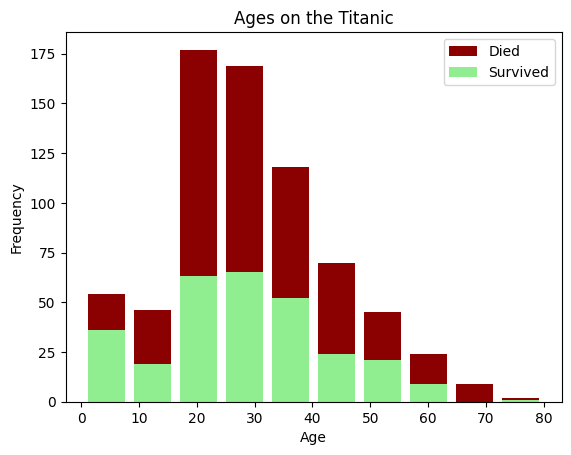

In [9]:
#Survivor data

Titanic_Data['Age'].plot(kind="hist", xlabel='Age', title='Ages on the Titanic', color='DarkRed', label='Died', legend='upperRight', rwidth=.80)
Survived['Age'].plot(kind="hist", xlabel='Age', title='Ages on the Titanic', color='LightGreen', label="Survived", legend='upperRight', rwidth=.80)

plt.savefig("figure0.png")

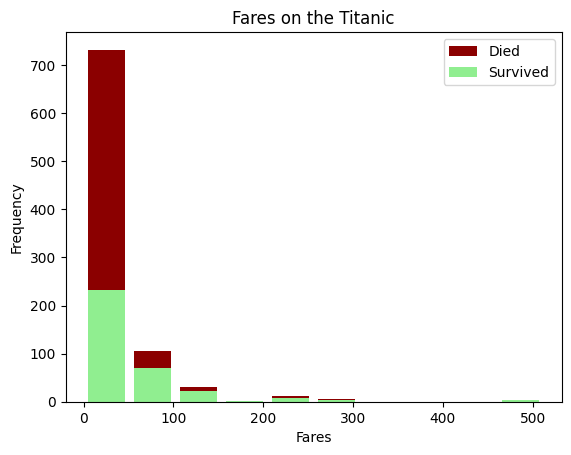

In [7]:
Titanic_Data['Fare'].plot(kind="hist", xlabel='Fares', title='Fares on the Titanic', color='DarkRed', label='Died', legend='upperRight', rwidth=.80)
Survived['Fare'].plot(kind="hist", xlabel='Fares', title='Fares on the Titanic', color='LightGreen', label="Survived", legend='upperRight', rwidth=.80)

plt.savefig("figure.png")

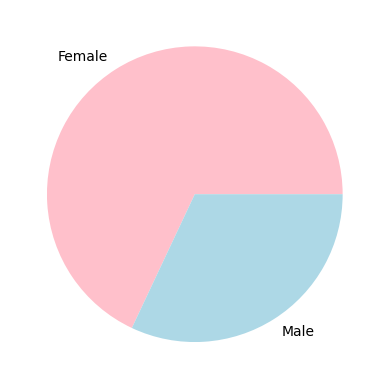

In [10]:
y = np.array([68,32])
mylabels = ["Female", "Male"]
mycolors = ["pink", "lightblue"]
mytitle = "Pie chart of Sex of Survivors"

plt.pie(y, labels = mylabels, colors = mycolors)

plt.savefig("figure2.png")

In [24]:
#Data
    #Fare
print ('Fare of survived: ', Survived['Fare'].mean())
print ('Fare of Total: ', Titanic_Data['Fare'].mean())

    #Age
print ('Age of survived: ', Survived['Age'].mean())
print ('Age of Total: ', Titanic_Data['Age'].mean())

    #Class
print ('Class of survived: ', Survived['Pclass'].mean())
print ('Class of Total: ', Titanic_Data['Pclass'].mean())

    #SibSp
print ('# of Siblings or Spouses brought aboard of survived: ', Survived['SibSp'].mean())
print ('# of Siblings or Spouses brought aboard of Total: ', Titanic_Data['SibSp'].mean())

plt.savefig("figure2.png")

Fare of survived:  48.39540760233918
Fare of Total:  32.204207968574636
Age of survived:  28.343689655172415
Age of Total:  29.69911764705882
Class of survived:  1.9502923976608186
Class of Total:  2.308641975308642
# of Siblings or Spouses brought aboard of survived:  0.47368421052631576
# of Siblings or Spouses brought aboard of Total:  0.5230078563411896


In [25]:
#Fare had a 48 average for survived but a lower average of 32 for total fare average meaning that the people that payed a higher fare had a higher chance of survival
#Age has a lower average at survival than the total meaning the younger you were the more likely you were to survive
#Opposed to the fare readings the class shows that there were more lower class people surviving which could that the lower class were being charged more for tickets than higher class we will have to look into this descrepancy later
#The average for brought a sibling or spuse aboard is lower than the total meaning that brining people lowered your chances of surviving

<Axes: title={'center': 'Low Class'}, ylabel='Fare'>

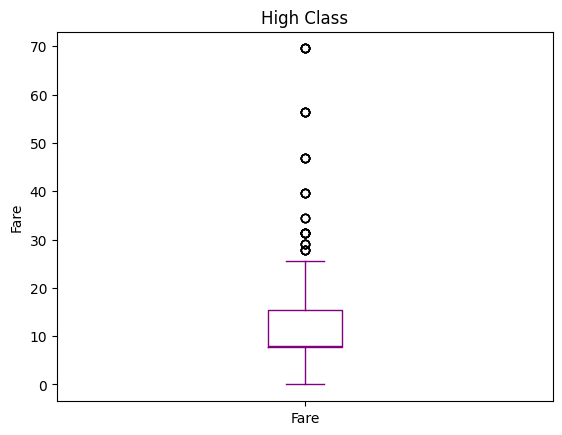

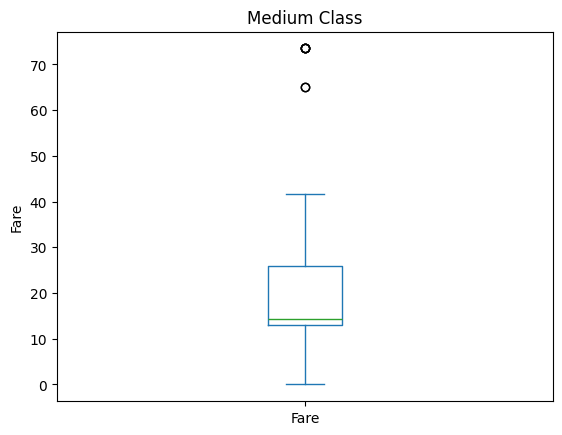

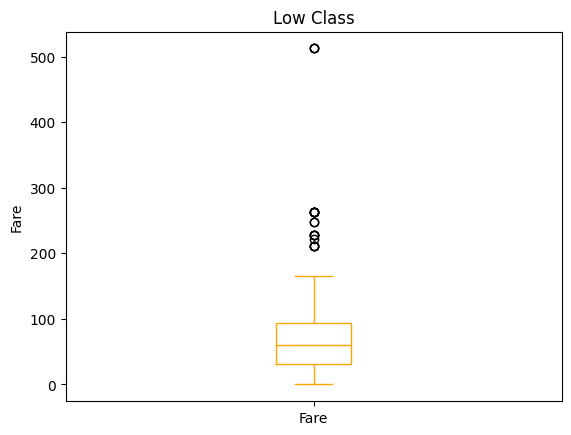

In [65]:
#Pricing anf class
#HighClass['Fare'].plot(kind="area", xlabel='PClass', title='Fares on the Titanic', color='purple', label="FAre", legend='upperRight', rwidth=.80)
#MidClass['Fare'].plot(kind="area", xlabel='Age', title='Fares on the Titanic', color='red', label="FAre", legend='upperRight', rwidth=.80)
#LowClass['Fare'].plot(kind="area", xlabel='Age', title='Fares on the Titanic', color='brown', label="FAre", legend='upperRight', rwidth=.80)
HighClass.plot(x ='Pclass' ,y='Fare', kind='box', color='purple', title = 'High Class', ylabel='Fare' )
MidClass.plot(x ='Pclass' ,y='Fare', kind='box', title = 'Medium Class', ylabel='Fare'  )
LowClass.plot(x ='Pclass' ,y='Fare', kind='box', color='orange', title = 'Low Class', ylabel='Fare'  )



In [72]:
# Excluding outliers
Q1 = HighClass['Fare'].quantile(0.25)
Q3 = HighClass['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter outliers
filtered_HighClass = HighClass[(HighClass['Fare'] >= lower_bound) & (HighClass['Fare'] <= upper_bound)]

Q1 = MidClass['Fare'].quantile(0.25)
Q3 = MidClass['Fare'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


filtered_MidClass = MidClass[(MidClass['Fare'] >= lower_bound) & (MidClass['Fare'] <= upper_bound)]

Q1 = LowClass['Fare'].quantile(0.25)
Q3 = LowClass['Fare'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


filtered_LowClass = LowClass[(LowClass['Fare'] >= lower_bound) & (LowClass['Fare'] <= upper_bound)]

<Axes: title={'center': 'Low Class'}, ylabel='Fare'>

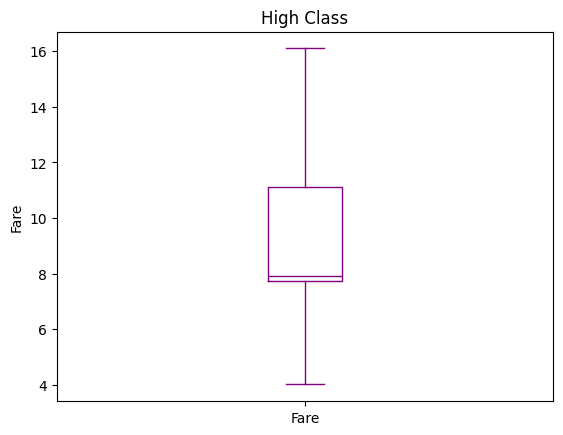

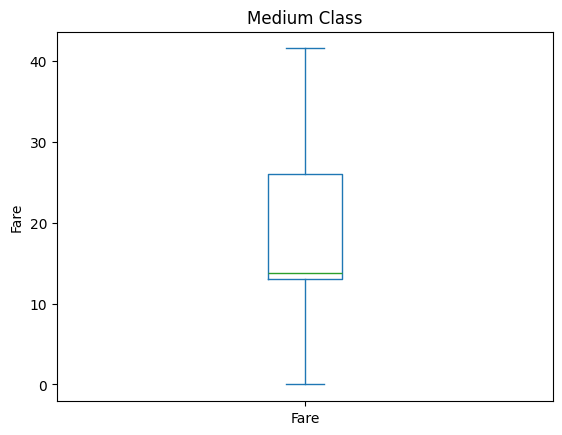

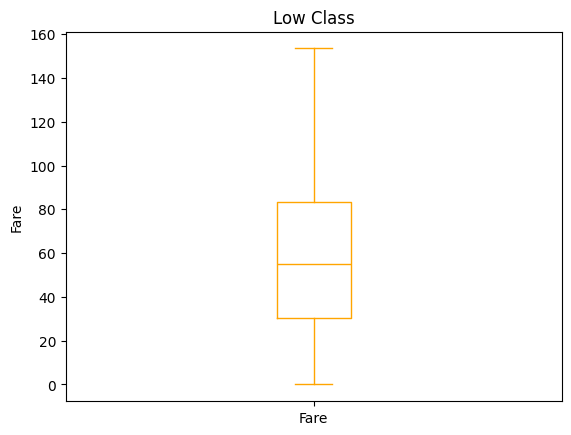

In [74]:
filtered_HighClass.plot(x ='Pclass' ,y='Fare', kind='box', color='purple', title = 'High Class', ylabel='Fare', showfliers=False )
filtered_MidClass.plot(x ='Pclass' ,y='Fare', kind='box', title = 'Medium Class', ylabel='Fare' , showfliers=False )
filtered_LowClass.plot(x ='Pclass' ,y='Fare', kind='box', color='orange', title = 'Low Class', ylabel='Fare', showfliers=False  )

In [76]:
#As you can see from these box plots the low class are paying significantly more both including and exclusing outliers

<Axes: title={'center': 'Cherbourg'}, xlabel='Survived', ylabel='Frequency'>

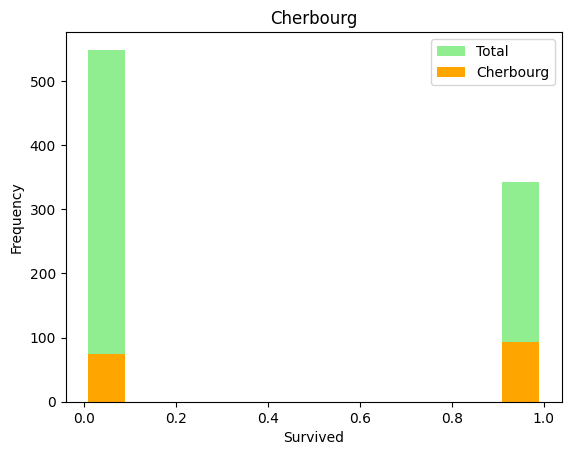

In [128]:
#Lastly i will determine if the place you embarked affects your survival and if thast is based on fares or class

     
#test = [
#    ['cherbourg', 'Queenstown', 'Southampton'], 
#    [Cherbourg['Survived'].count(),Queenstown['Survived'].count(),Southampton['Survived'].count()]
#]
#
#plt.plot(x =test[0] ,y=test[1], kind='bar', title = 'Embarked location', ylabel='survived')
Titanic_Data['Survived'].plot(kind="hist", xlabel='Survived', title='Cherbourg', color='LightGreen', label='Total', legend='upperRight', rwidth=.80)
Cherbourg['Survived'].plot(kind="hist", xlabel='Survived', title='Cherbourg', color='Orange', label="Cherbourg", legend='upperRight', rwidth=.80)

<Axes: title={'center': 'Queenstown'}, xlabel='Survived', ylabel='Frequency'>

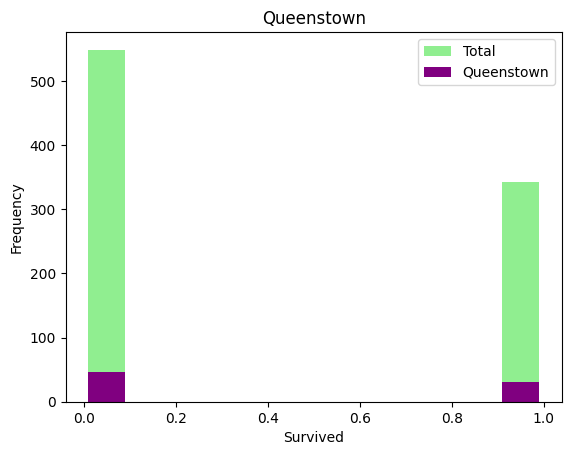

In [129]:
Titanic_Data['Survived'].plot(kind="hist", xlabel='Survived', title='Queenstown', color='LightGreen', label='Total', legend='upperRight', rwidth=.80)
Queenstown['Survived'].plot(kind="hist", xlabel='Survived', title='Queenstown', color='Purple', label="Queenstown", legend='upperRight', rwidth=.80)

<Axes: title={'center': 'Southampton'}, xlabel='Survived', ylabel='Frequency'>

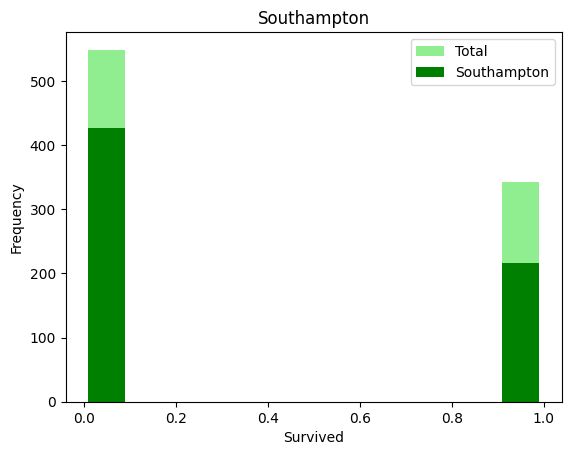

In [130]:
Titanic_Data['Survived'].plot(kind="hist", xlabel='Survived', title='Southampton', color='LightGreen', label='Total', legend='upperRight', rwidth=.80)
Southampton['Survived'].plot(kind="hist", xlabel='Survived', title='Southampton', color='Green', label="Southampton", legend='upperRight', rwidth=.80)

In [131]:
# 1 = survived and 0 = died so that means that there is little to no correlation between survival and embarkment as they are
#typically even in deaths and survivals per location with southhampton having a slightly higher death rate and also majority of the 
#boardings which makes sense as more people died than survived the sinking

<Axes: title={'center': 'Siblings and spouse survival'}, xlabel='Siblings and spouses', ylabel='Frequency'>

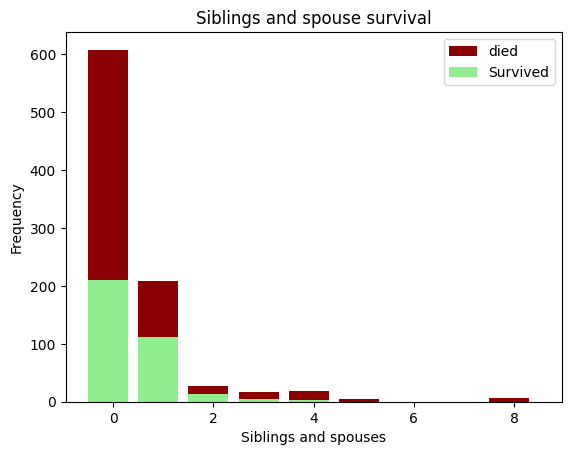

In [153]:
Titanic_Data['SibSp'].plot(kind="hist", xlabel='Siblings and spouses', title='Siblings and spouse survival', color='darkRed', label='died', legend='upperRight', width=.8, bins=np.arange(10)-0.5)
Survived['SibSp'].plot(kind="hist", xlabel='Siblings and spouses', title='Siblings and spouse survival', color='lightGreen', label="Survived", legend='upperRight', width=.8, bins=np.arange(10)-0.5)

<Figure size 900x900 with 0 Axes>

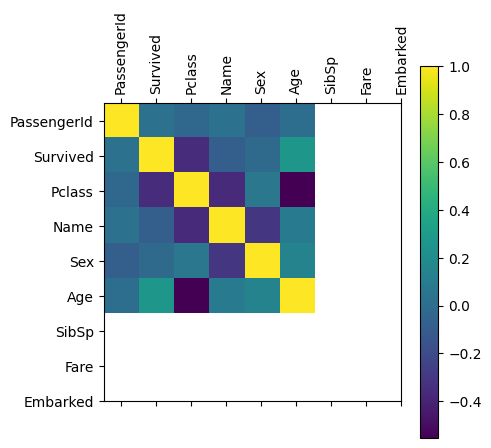

In [38]:
#this shows that while many people didnt bring an siblings or spouses if they did they would have a higher chance at surviving as long as they brought less than 4

Titanic_Data.drop(["Cabin", "Ticket"], axis=1, inplace=True)
    
TCorr = Titanic_Data.corr(numeric_only=True)

plt.matshow(TCorr)
plt.xticks(range(10), Titanic_Data.columns, rotation = 90)
plt.yticks(range(10), Titanic_Data.columns, rotation = 0)
plt.colorbar()


In [11]:
Age sb sp
age fare
age sb sp scatter

SyntaxError: invalid syntax (934119179.py, line 1)

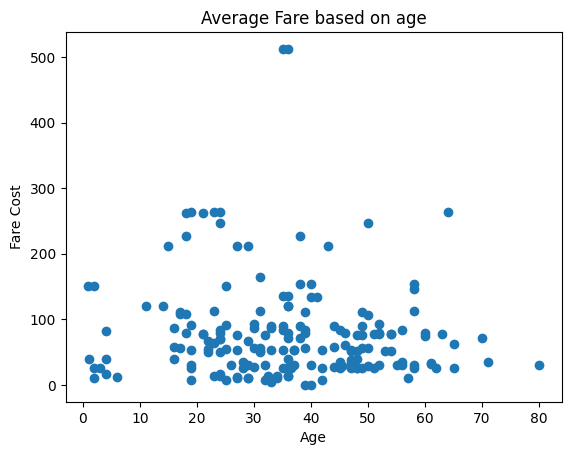

<Figure size 640x480 with 0 Axes>

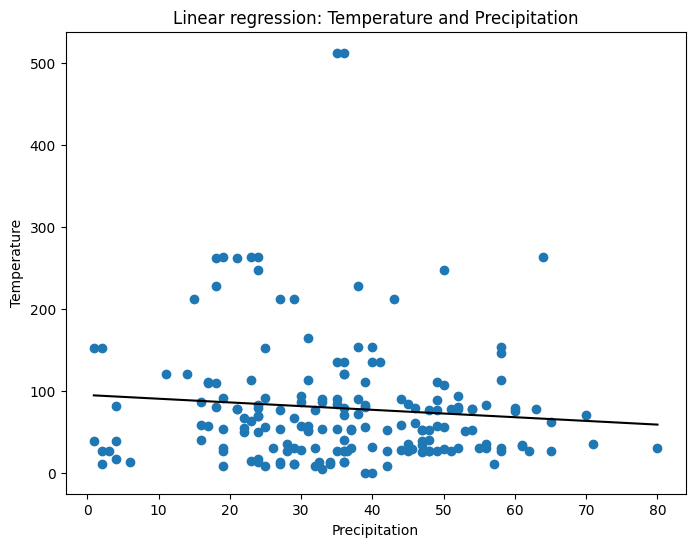

In [33]:
plt.scatter(Titanic_Data['Age'], Titanic_Data['Fare'])
plt.ylabel('Fare Cost')
plt.xlabel('Age')
plt.title('Average Fare based on age')
plt.show()

plt.savefig("figure3.png")

x = Titanic_Data['Age']
x = np.array(x).reshape((-1, 1)) # we need to work with a np array and to reshape it

y = Titanic_Data['Fare']

# Create and fit model
model = LinearRegression()
model.fit(x, y)

r2 = model.score(x,y)
coefficients = model.coef_
intercept = model.intercept_


# Init plots/
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(Titanic_Data['Age'], Titanic_Data['Fare'])

# Define parameters of the regression line
num = len(Titanic_Data)
start = Titanic_Data['Age'].min()
end = Titanic_Data['Age'].max()
xseq = np.linspace(start, end, num=num)

# Plot the line
ax.plot(xseq, intercept+coefficients[0]*xseq, color="black", lw=1.5)

# Add a title and axis label
ax.set_title('Linear regression: Temperature and Precipitation')
ax.set_xlabel('Precipitation')
ax.set_ylabel('Temperature')

# Show the plot
plt.show()

In [26]:
contingency_table = pd.crosstab(Titanic_Data['Age'], Titanic_Data['Survived'])
print(contingency_table)

Survived  0  1
Age           
0.92      0  1
1.00      0  1
2.00      2  1
3.00      0  1
4.00      0  3
...      .. ..
64.00     1  0
65.00     2  0
70.00     1  0
71.00     1  0
80.00     0  1

[63 rows x 2 columns]


In [25]:
Titanic_Data.info()
Titanic_Data = Titanic_Data.dropna()

contingency = Titanic_Data[['Survived', 'Age']].values

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")


<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
Chi-squared statistic: 206.65477784041582
P-value: 0.10156227712168153
Degrees of freedom: 182
Expected frequencies:
[[7.21199383e-01 3.82788006e+01]
 [6.65722507e-01 3.53342775e+01]
 [9.98583761e-01 5.30014162e+01]
 [9.24614594e-02 4.90753854e+00]
